In [2]:
import librosa
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import IPython.display as ipd

Testing a possible segmentation technique...

In [16]:
data = pd.DataFrame(columns=["x{}".format(i) for i in range(200)]+["Frontier"])

In [19]:
y, sr = librosa.load("../Samples/Guitar/Ind_notes/Guitar_noamp_string7_1.mp3", mono=False)
y = librosa.core.to_mono(y)
y = librosa.resample(y, sr, 8000)

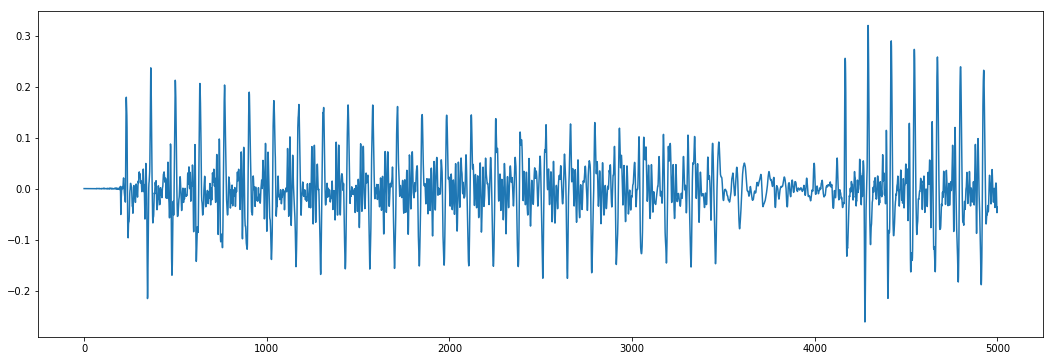

In [23]:
plt.figure(figsize=(18,6))
plt.plot(y[:5000])

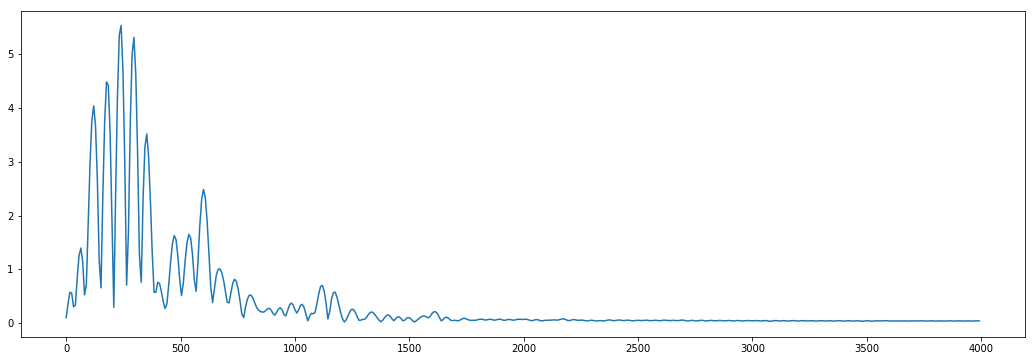

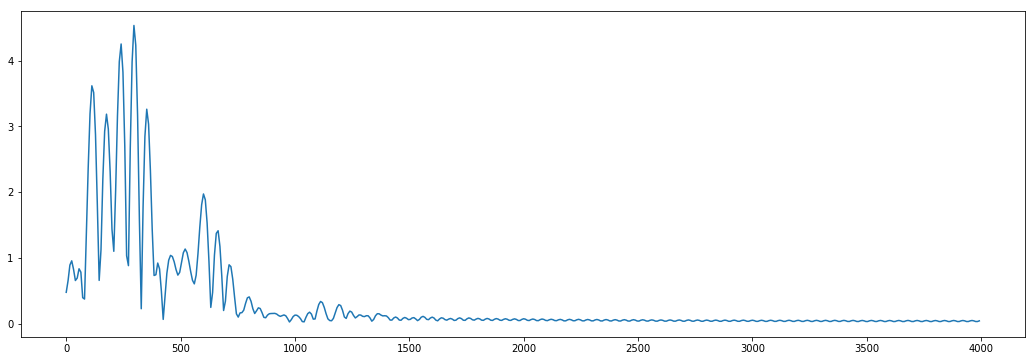

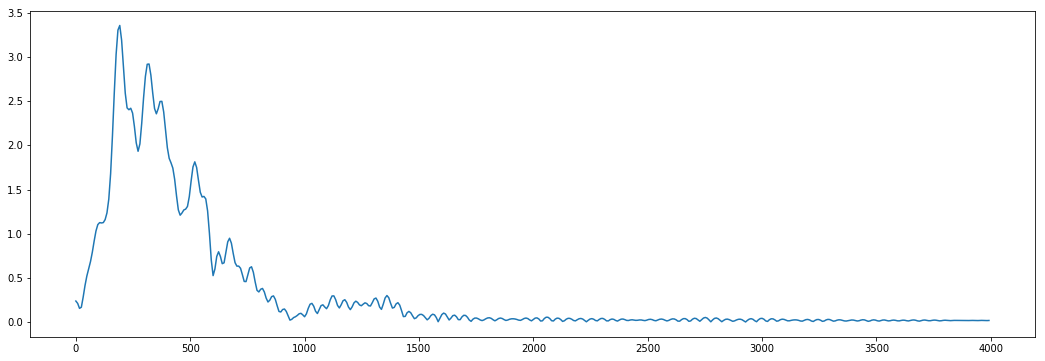

In [29]:
w = np.fft.fft(y[1000:1200], n=1000)
freqs = np.fft.fftfreq(len(w))
plt.figure(figsize=(18,6))
plt.plot(8000*freqs[freqs >= 0],abs(w[freqs >= 0]))
w = np.fft.fft(y[3000:3200], n=1000)
freqs = np.fft.fftfreq(len(w))
plt.figure(figsize=(18,6))
plt.plot(8000*freqs[freqs >= 0],abs(w[freqs >= 0]))
w = np.fft.fft(y[4000:4200], n=1000)
freqs = np.fft.fftfreq(len(w))
plt.figure(figsize=(18,6))
plt.plot(8000*freqs[freqs >= 0],abs(w[freqs >= 0]))

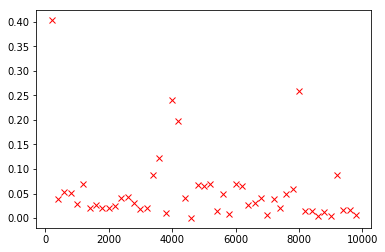

In [49]:
for i in range(200, 10000, 200):
    w_before = np.abs(np.fft.fft(y[i-200:i], n=1000))
    w = np.abs(np.fft.fft(y[i:i+200], n=1000))
    plt.plot(i, np.abs(np.mean(w_before - w)), 'rx')

In [70]:
y, sr = librosa.load("../Samples/Guitar/Riffs/Guitar_noamp_riff1.mp3", mono=False)
y = librosa.core.to_mono(y)
y = librosa.resample(y, sr, 8000)

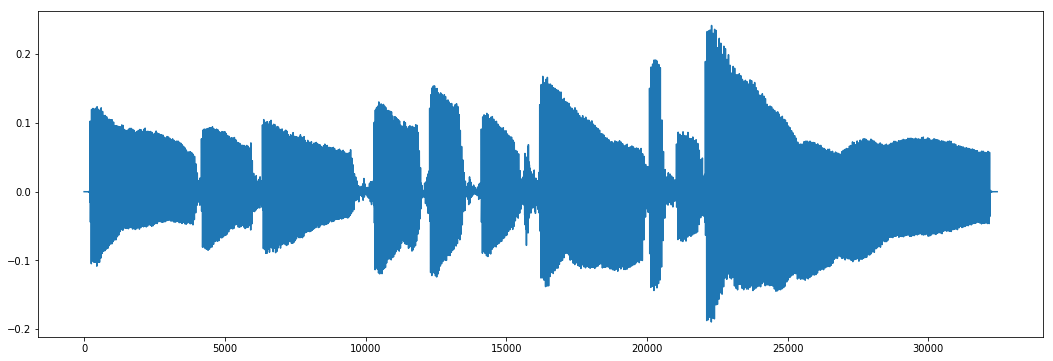

In [71]:
plt.figure(figsize=(18,6))
plt.plot(y)

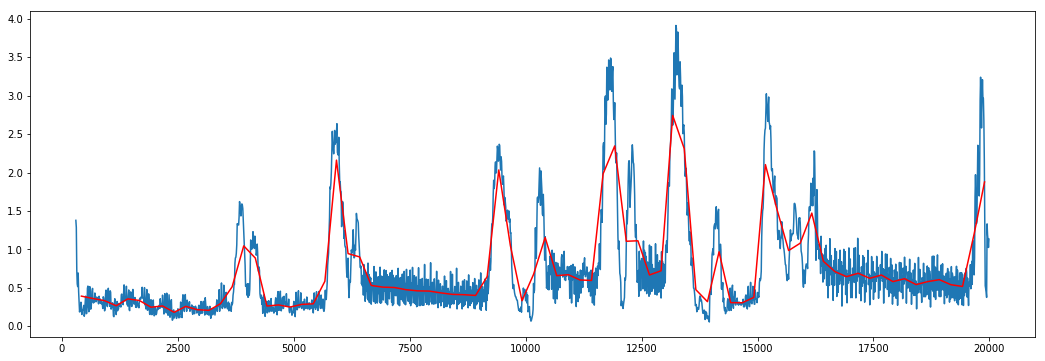

In [95]:
plt.figure(figsize=(18,6))
a = []
b = []
for i in range(300, 20000, 10):
    w_before = np.abs(np.fft.fft(y[i-150:i+150], n=1000))
    w = np.abs(np.fft.fft(y[i:i+300], n=1000))
    a.append(i)
    b.append(np.abs(np.max(w_before - w)))

plt.plot(a, b)
c = []
d = []
for i in range(0, len(b), 25):
    c.append(np.mean(a[i:i+25]))
    d.append(np.mean(b[i:i+25]))
plt.plot(c, d, 'r')